In [33]:
def  regionGrow(img,p1,p2):
    #p1,p2分别是两个种子点的坐标
    img_array = np.array(img)#图片转为数组方便操作
    [m,n]=img_array.shape#返回图片的长和宽
    a = np.zeros((m,n)) #建立等大小空矩阵
    a[p1]=1 #设立种子点
    a[p2]=1
    k = 30 #设立生长阈值
    is_My_Area=1 
    while is_My_Area==1:
        is_My_Area=0
        lim = (np.cumsum(img_array*a)[-1])/(np.cumsum(a)[-1])
        for i in range(2,m-2):
            for j in range(2,n-2):
                if a[i,j]==1:
                    for x in range(-1,2):
                        for y in range(-1,2):
                            if a[i+x,j+y]==0:
                                if (abs(img_array[i+x,j+y]-lim)<=k) :
                                    is_My_Area = 1
                                    a[i+x,j+y]=1
    data = img_array*a #矩阵相乘获取生长图像的矩阵
#     new_img = Image.fromarray(data) #data矩阵转化为二维图片
    return data


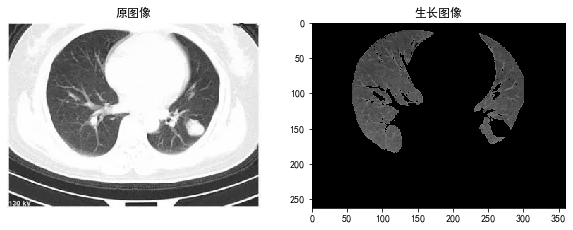

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负
# from chap2_createImage import *
%matplotlib inline

image0 = cv2.imread(r'..\img\lung.jpg',0)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(image0,vmin=0, vmax=255,cmap = plt.cm.gray)
plt.title('原图像')
image1= regionGrow(image0,(100,100),(100,250))
plt.subplot(1,2,2)
plt.imshow(image1,vmin=0, vmax=255,cmap = plt.cm.gray)
plt.title('生长图像')
plt.show()

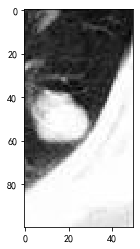

In [30]:
aa=image0[100:200,250:300]
plt.imshow(aa,cmap="gray")